# Feature detection

## Harris Corner detection

As always we start with the imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

To start, we will use the same checkerboard image as earlier.

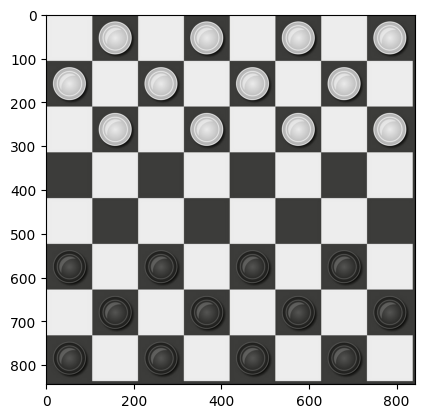

In [2]:
img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [`cv2.cornerHarris`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345). Afterwards we want to draw the location of the detected corners on the image and display it.

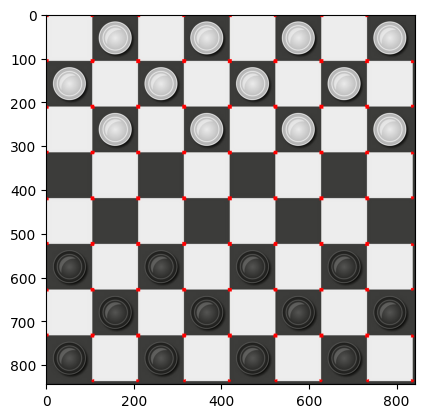

In [3]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
corners = cv2.cornerHarris(gray, blockSize=8, ksize=3, k=0.04, borderType=cv2.BORDER_DEFAULT)

### Draw the detected corners in the original image here ###
threshold = 0.1 * corners.max()
img[corners > threshold] = [255, 0, 0]

# Display image
plt. imshow(img)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV, that method is implemented as [`cv2.goodFeaturesToTrack`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). 
Let's start with a different image this time.

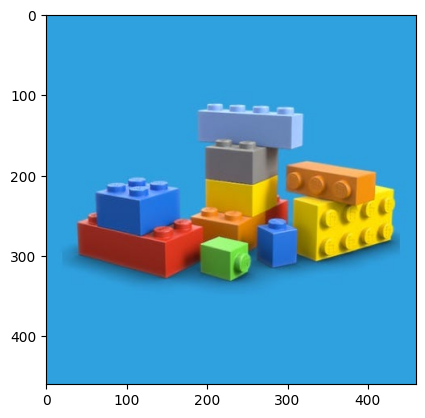

In [2]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

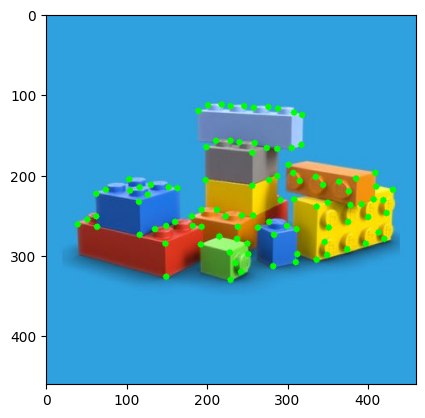

In [4]:
# Load the image fresh each time to avoid overlapping old corners
img = cv2.imread('Lego.jpg')

b, g, r = cv2.split(img)
img_rgb = cv2.merge([r, g, b])

# Convert image to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Shi-Tomasi Corner Detection with stronger corners
corners = cv2.goodFeaturesToTrack(gray, maxCorners=200, qualityLevel=0.05, minDistance=10)
corners = np.array(corners, dtype=np.int32)

# Draw the detected corners on the freshly loaded image
for i in corners:
    x, y = i.ravel()
    cv2.circle(img_rgb, (x, y), 4, (0, 255, 0), -1)

plt.imshow(img_rgb)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

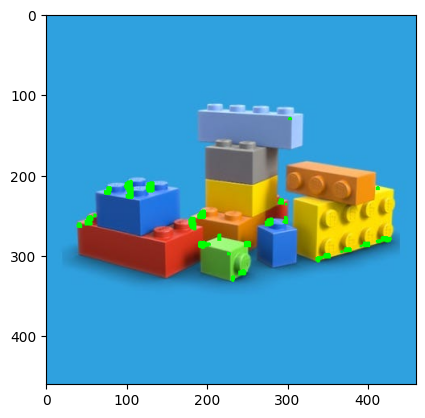

In [5]:
img = cv2.imread('Lego.jpg')

b, g, r = cv2.split(img)
img_rgb = cv2.merge([r, g, b])

# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
corners = cv2.cornerHarris(gray, blockSize=8, ksize=3, k=0.04, borderType=cv2.BORDER_DEFAULT)
corners = cv2.dilate(corners, None)

### Draw the detected corners in the original image here ###
threshold = 0.1 * corners.max()
img_rgb[corners > threshold] = [0, 255, 0]

# Display image
plt. imshow(img_rgb)